In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
import numpy as np
import math
import os
import random
import re
import sys
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [49]:
# Accelerator pedal range of motion study
# Define the contracted and extended lengths of the potentiometer in inches
# Define a range of lengths "h" that specifies how far away the top end
# point of the potentiometer is from the pivot of the accelerator pedal
# Define a range of lengths "l" that specifies how far away the bottom end
# point of the potentiometer is from the pivot of the accelerator pedal
# Have a for loop that plots the range of motion "r" against "h".

l = np.round(np.linspace(1, 4.4, 18), 1);
h = np.round(np.linspace(1, 4.4, 18), 1);
c = 3.86
x = 1.06
thetaRange = []
results = pd.DataFrame(columns=[l]).reindex(h);

# Calculate range for change in "l" with "h" held at 1 inch

In [50]:
def getRange(l, h):
    minAngle = np.arccos((l**2 + h**2 - c**2)/(2*h*l))
    maxAngle = np.arccos((l**2 + h**2 - (c+x)**2)/(2*h*l))
    degMax = maxAngle*(180/np.pi)
    degMin = minAngle*(180/np.pi)
    thetaRange.append(degMax-degMin)
    Range = degMax - degMin
    return [Range]
    #print(Range)

In [51]:
for i in range(len(l)):
    for j in range(len(h)):
        results.loc[l[i]][h[j]] = pd.DataFrame(getRange(l[i], h[j]))

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
def plot_results(results):
    finalResult = results.fillna(0)
    ax = plt.axes()
    sns.heatmap(finalResult, annot=True)
    ax.set_title('Range of motion <degrees> vs h vs l <inch>')
    ax.set_xlabel('l <inch> - distance from fulcrum to bottom end of linpot')
    ax.set_ylabel('h <inch> - distance from fulcrum to top end of linpot')
    plt.show()



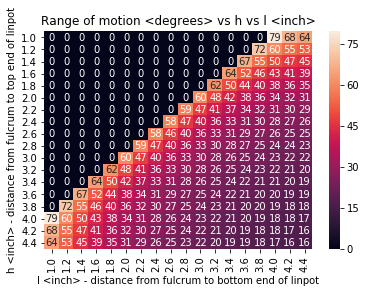

In [53]:
plot_results(results)

In [54]:
def plot_throttle_response(l, h):
    minAngle = np.arccos((l**2 + h**2 - c**2)/(2*h*l))
    maxAngle = np.arccos((l**2 + h**2 - (c+x)**2)/(2*h*l))
    thetaSweep = (np.linspace(maxAngle, minAngle))
    potLength = []
    for i in range(len(thetaSweep)):
        potLength.append((l**2 + h**2 - 2*l*h*np.cos(thetaSweep[i]))**0.5)
        
    fig, ax1 = plt.subplots()
    ax1.plot(thetaSweep*(180/np.pi), potLength)
    ax1.set_title("Throttle Response")
    ax1.set_xlabel("Angle of pedal")
    ax1.set_ylabel("Length of potentiometer")

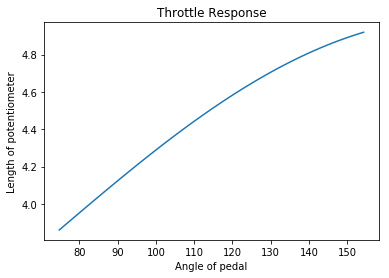

In [69]:
plot_throttle_response(4,1)

In [39]:
print(results.loc[3.2, 4.2])

4.2    21.0201
Name: 3.2, dtype: object
